# Infection analysis

This notebook aims to check ressilience of the nodes and understand their influence, We focus on answers as in real world only answers indicate real exchange of the information. 

In [1]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import graphviz
import numpy as np
import math
import operator
import matplotlib
import function as fn
from infection.infection_process import multiple_processes
from infection.charts import *


In [2]:
# general settings for charts
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

main_color = '#0000b3'
main_color2 = '#b30000'
secondary_color = '#b3b3ff'

## Compute data

In [3]:
dataset_options = {
    1 : 'data/mathoverflow/sx-mathoverflow-a2q.txt',
    2 : 'data/mathoverflow/sx-mathoverflow-c2q.txt',
    3 : 'data/mathoverflow/sx-mathoverflow-c2a.txt',
}

In [4]:
nodes, edges_per_t = fn.read_graph_from_file(dataset_options[1])

In [42]:
processes_info_G2 = multiple_processes(nodes, edges_per_t, 'random', 100, -1) 

0. Seed: 20589
(107548, 101)
1. Seed: 80739
(107548, 101)
2. Seed: 63981
(107548, 101)
3. Seed: 46127
(107548, 101)
4. Seed: 23306
(107548, 101)
5. Seed: 47823
(107548, 101)
6. Seed: 17424
(107548, 101)
7. Seed: 27772
(107548, 101)
8. Seed: 33062
(107548, 101)
9. Seed: 2039
(107548, 101)
10. Seed: 83234
(107548, 101)
11. Seed: 33332
(107548, 101)
12. Seed: 82032
(107548, 101)
13. Seed: 494
(107548, 101)
14. Seed: 19108
(107548, 101)
15. Seed: 11035
(107548, 101)
16. Seed: 21994
(107548, 101)
17. Seed: 82201
(107548, 101)
18. Seed: 7827
(107548, 101)
19. Seed: 16758
(107548, 101)
20. Seed: 38893
(107548, 101)
21. Seed: 22518
(107548, 101)
22. Seed: 9197
(107548, 101)
23. Seed: 11218
(107548, 101)
24. Seed: 3557
(107548, 101)
25. Seed: 908
(107548, 101)
26. Seed: 30779
(107548, 101)
27. Seed: 16705
(107548, 101)
28. Seed: 5593
(107548, 101)
29. Seed: 5497
(107548, 101)
30. Seed: 37867
(107548, 101)
31. Seed: 75312
(107548, 101)
32. Seed: 42400
(107548, 101)
33. Seed: 29328
(107548, 101)


In [43]:
np.save('infection_data/process_info', processes_info_G2)

In [44]:
processes_info_G2=np.load('infection_data/process_info.npy')

## Data analysis

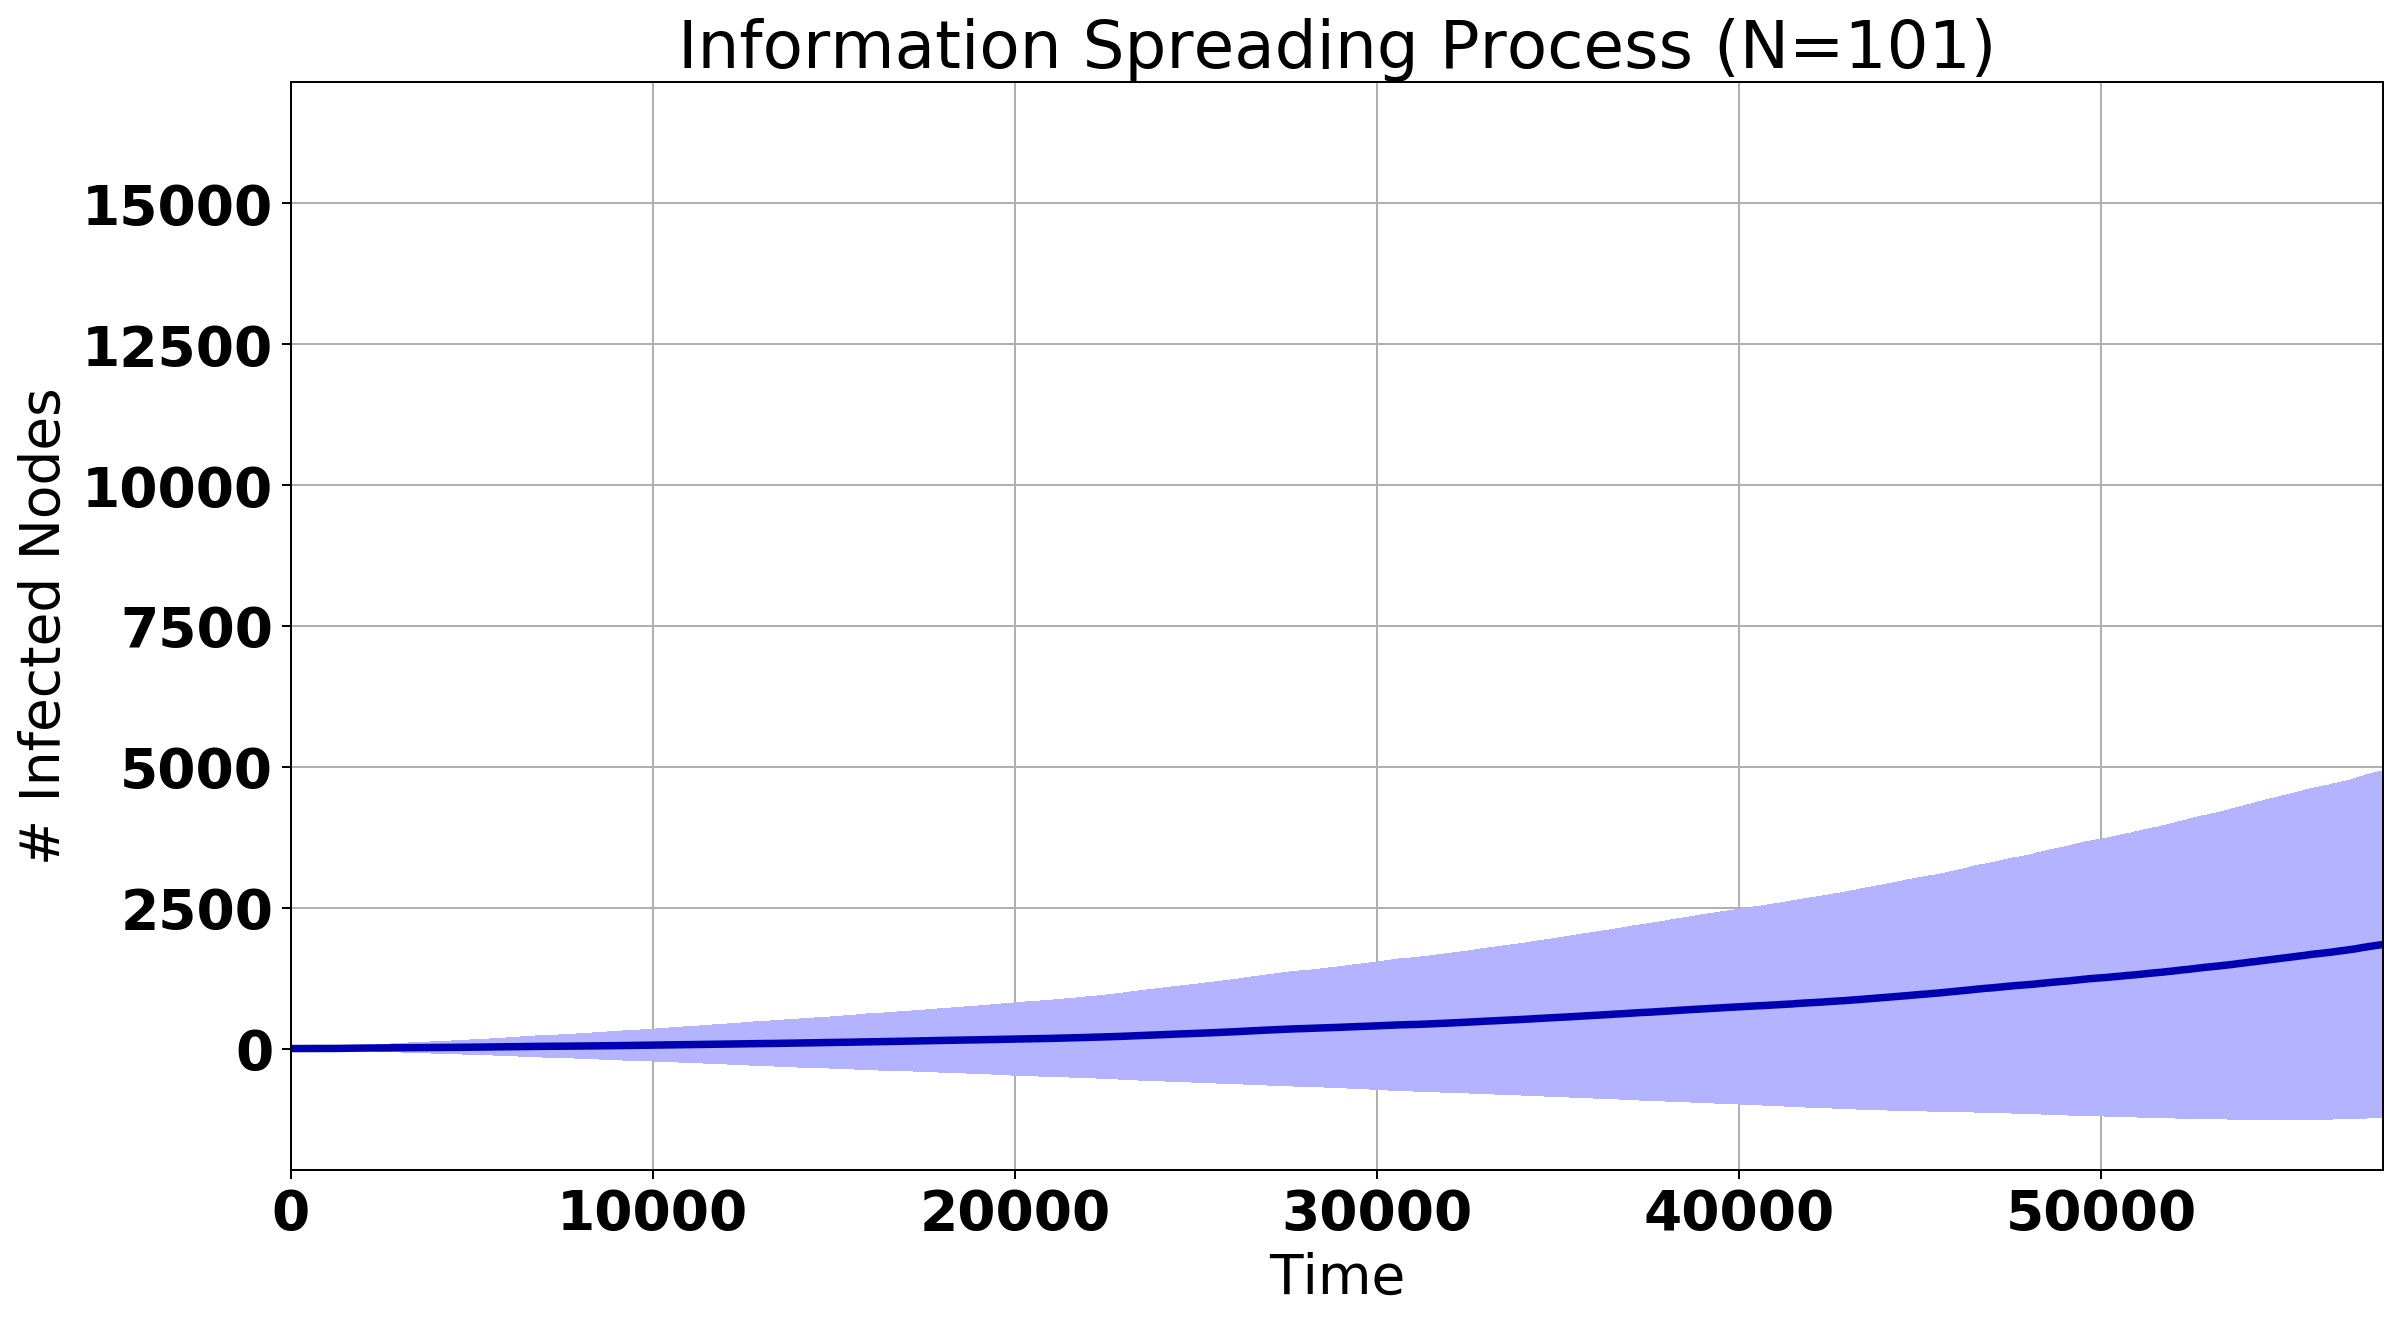

In [45]:
infectionProcessChart(True,processes_info_G2)

In [46]:
G2 = fn.generate_aggregated_graph(nodes, edges_per_t)

In [47]:
def get_G_local_clustering(G):
    G_local_clustering = np.zeros((max(G.nodes()), 2))
    for k, v in nx.clustering(G).items():
        G_local_clustering[k - 1, 0] = k
        G_local_clustering[k - 1, 1] = v
    return G_local_clustering

In [48]:
def get_rankings_node_feature(array, column_to_order, asc):
    # The input array must have the nodes ids in the first column
    # and the value of the metric in the 'column to order' column.
    rankings = np.zeros((len(array), 3));
    ordered_array = array[((1 if asc else -1) * array[:, column_to_order]).argsort()]
    for i in range(len(rankings)):
        rankings[i, 0] = ordered_array[i, 0]
        rankings[i, 1] = ordered_array[i, column_to_order]
        rankings[i, 2] = i + 1
    return rankings

In [49]:
def get_graph_degrees(G):
    G_degrees = np.zeros((max(G.nodes()), 2))
    for i, v in G.degree():
        G_degrees[i-1, 0] = i
        G_degrees[i-1, 1] = v
    return G_degrees

In [54]:
def order_nodes_frac_infected_ranking(processes_info, frac):
    cumsum = processes_info[1].cumsum(axis=0)
    nodes_reached_fraction = np.zeros((cumsum.shape[1], 3))
    for i in range(cumsum.shape[1]):  # per node
        for j in range(cumsum.shape[0]):  # per time-step
            if cumsum[j][i] >= frac:
                nodes_reached_fraction[i, 0] = i + 1
                nodes_reached_fraction[i, 1] = j
                break
            if j == cumsum.shape[0] - 1:
                nodes_reached_fraction[i, 0] = i + 1
                nodes_reached_fraction[i, 1] = cumsum.shape[0] * 2

    # Order list by column and append index
    nodes_reached_fraction = nodes_reached_fraction[nodes_reached_fraction[:, 1].argsort()]
    for i in range(len(nodes_reached_fraction)):
        nodes_reached_fraction[i, 2] = i + 1

    return nodes_reached_fraction

In [59]:
G2_ranking_influence = order_nodes_frac_infected_ranking(processes_info_G2, 0.8 * G2.number_of_nodes())
G2_ranking_influence

array([[1.40000e+01, 9.22450e+04, 1.00000e+00],
       [4.30000e+01, 9.22520e+04, 2.00000e+00],
       [2.60000e+01, 9.23740e+04, 3.00000e+00],
       [1.00000e+01, 9.33550e+04, 4.00000e+00],
       [2.50000e+01, 9.51440e+04, 5.00000e+00],
       [4.00000e+01, 9.70910e+04, 6.00000e+00],
       [4.20000e+01, 9.78630e+04, 7.00000e+00],
       [6.40000e+01, 9.97030e+04, 8.00000e+00],
       [1.90000e+01, 1.00185e+05, 9.00000e+00],
       [2.90000e+01, 1.01086e+05, 1.00000e+01],
       [6.30000e+01, 1.01621e+05, 1.10000e+01],
       [2.30000e+01, 1.02524e+05, 1.20000e+01],
       [6.20000e+01, 1.02995e+05, 1.30000e+01],
       [9.40000e+01, 1.05348e+05, 1.40000e+01],
       [2.40000e+01, 1.05873e+05, 1.50000e+01],
       [4.90000e+01, 1.06885e+05, 1.60000e+01],
       [7.20000e+01, 2.15096e+05, 1.70000e+01],
       [7.40000e+01, 2.15096e+05, 1.80000e+01],
       [7.10000e+01, 2.15096e+05, 1.90000e+01],
       [7.30000e+01, 2.15096e+05, 2.00000e+01],
       [1.00000e+00, 2.15096e+05, 2.1000

In [56]:
G2_local_clustering=get_G_local_clustering(G2)
G2_ranking_clustering = get_rankings_node_feature(G2_local_clustering, 1,False)

In [64]:
print(G2_ranking_clustering)

[[5.8228e+04 1.0000e+00 1.0000e+00]
 [1.2800e+04 1.0000e+00 2.0000e+00]
 [1.9506e+04 1.0000e+00 3.0000e+00]
 ...
 [0.0000e+00 0.0000e+00 8.8574e+04]
 [3.2749e+04 0.0000e+00 8.8575e+04]
 [8.8576e+04 0.0000e+00 8.8576e+04]]


In [57]:
G2_degrees = get_graph_degrees(G2)
G2_ranking_degrees = get_rankings_node_feature(G2_degrees, 1, False)

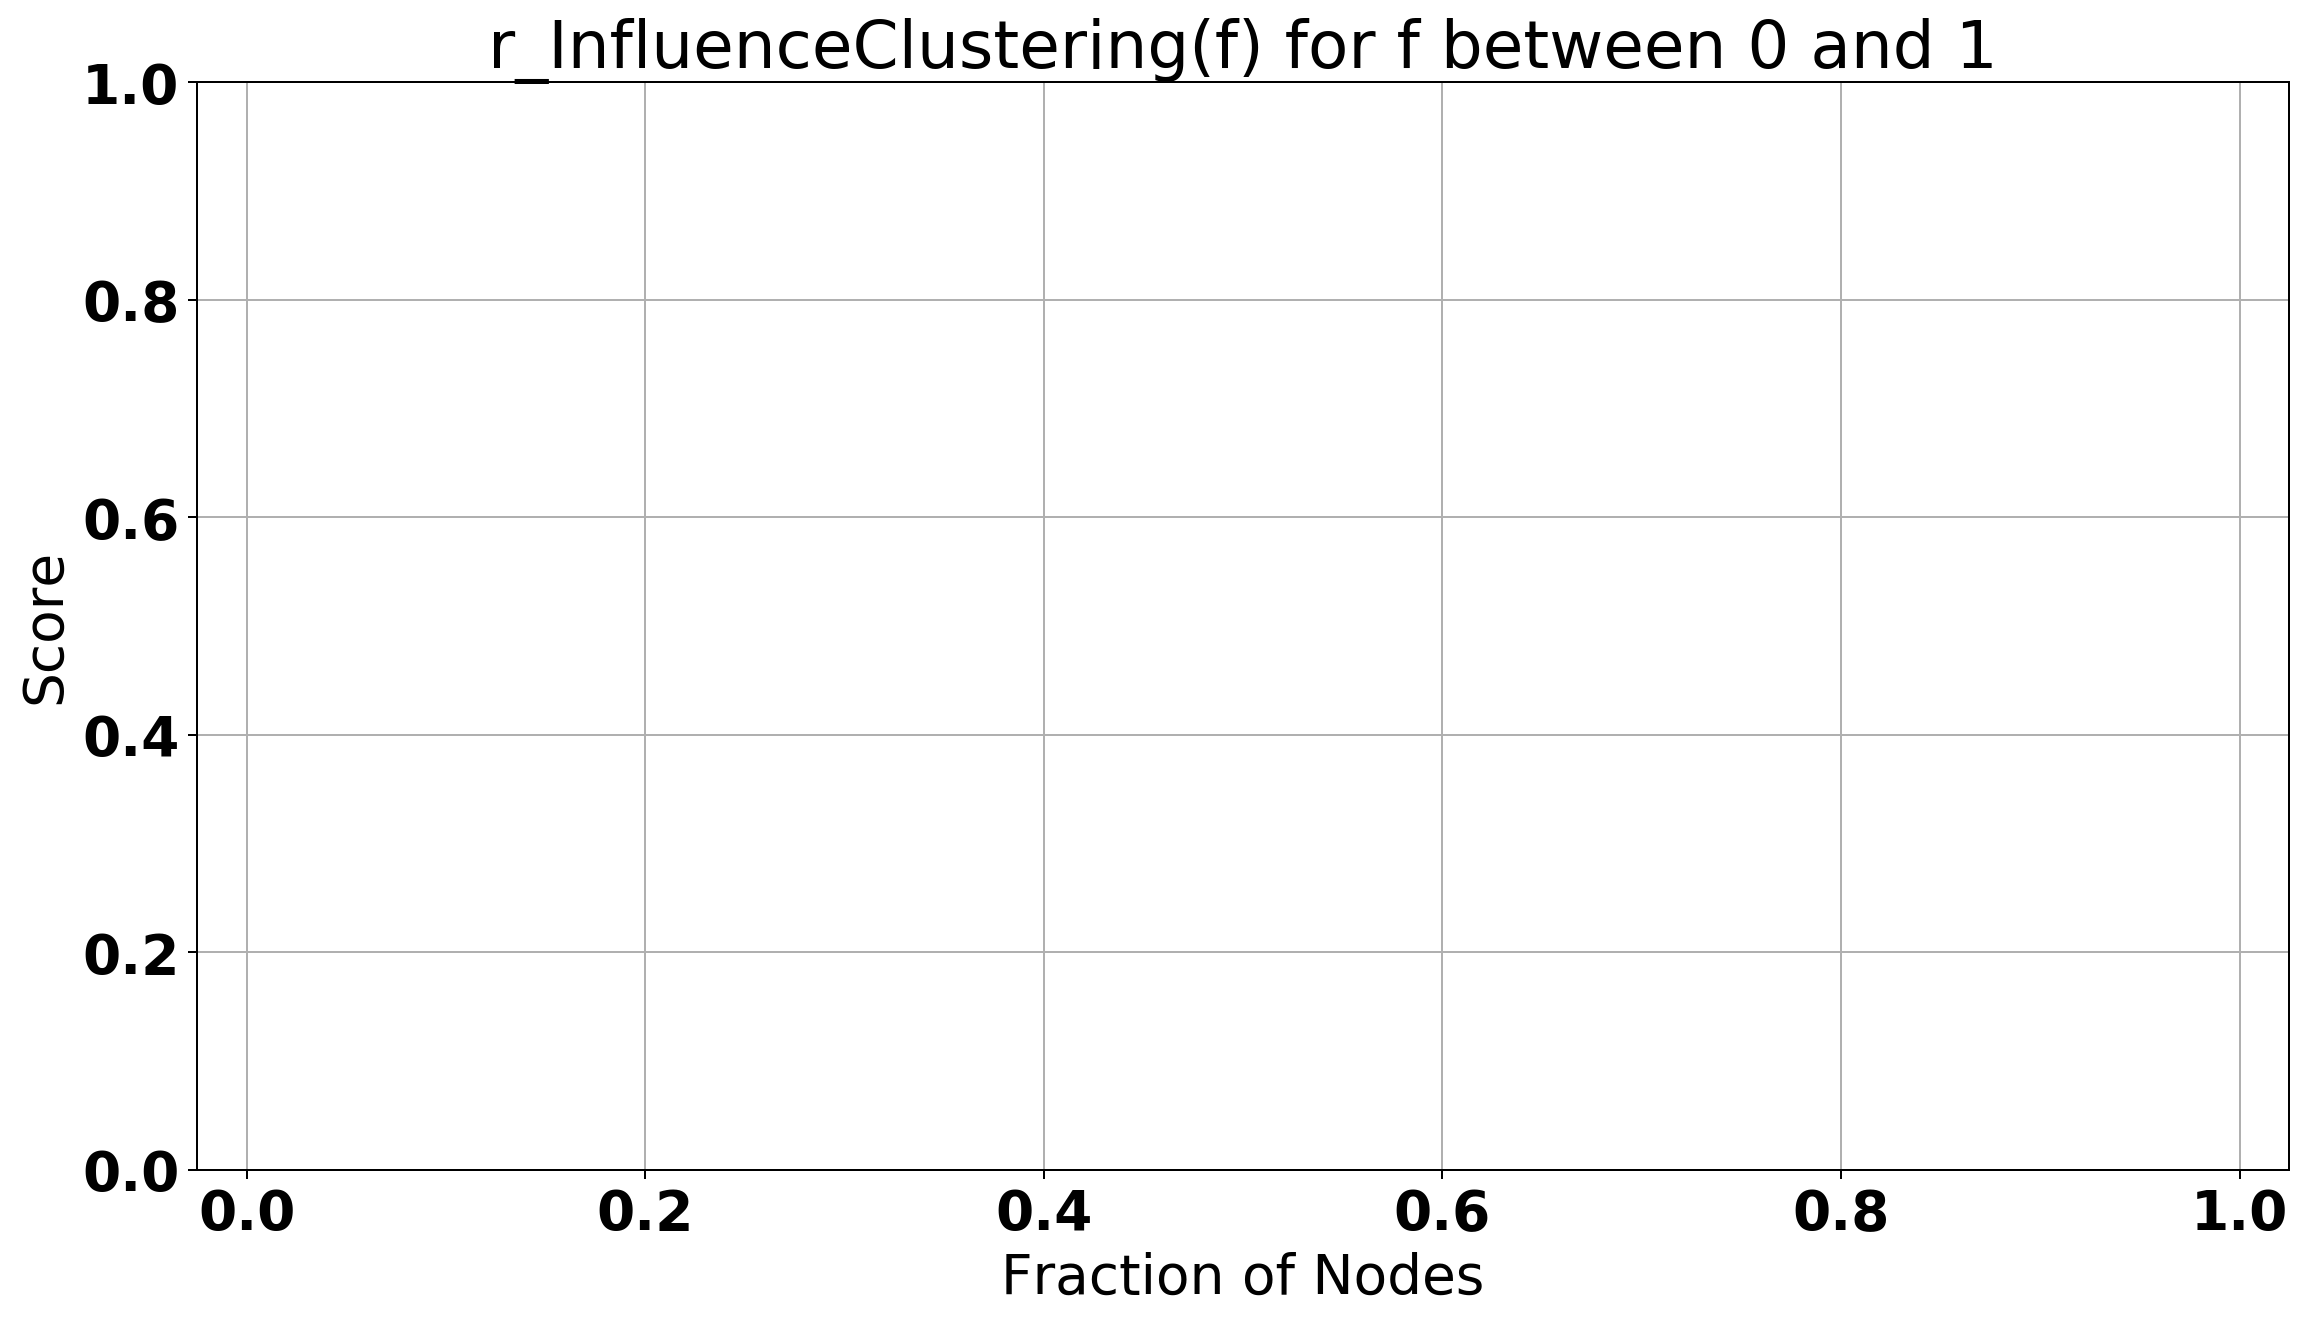

In [65]:
recognitionRateChart(True, 'Influence', G2_ranking_influence, 'Clustering', G2_ranking_clustering)

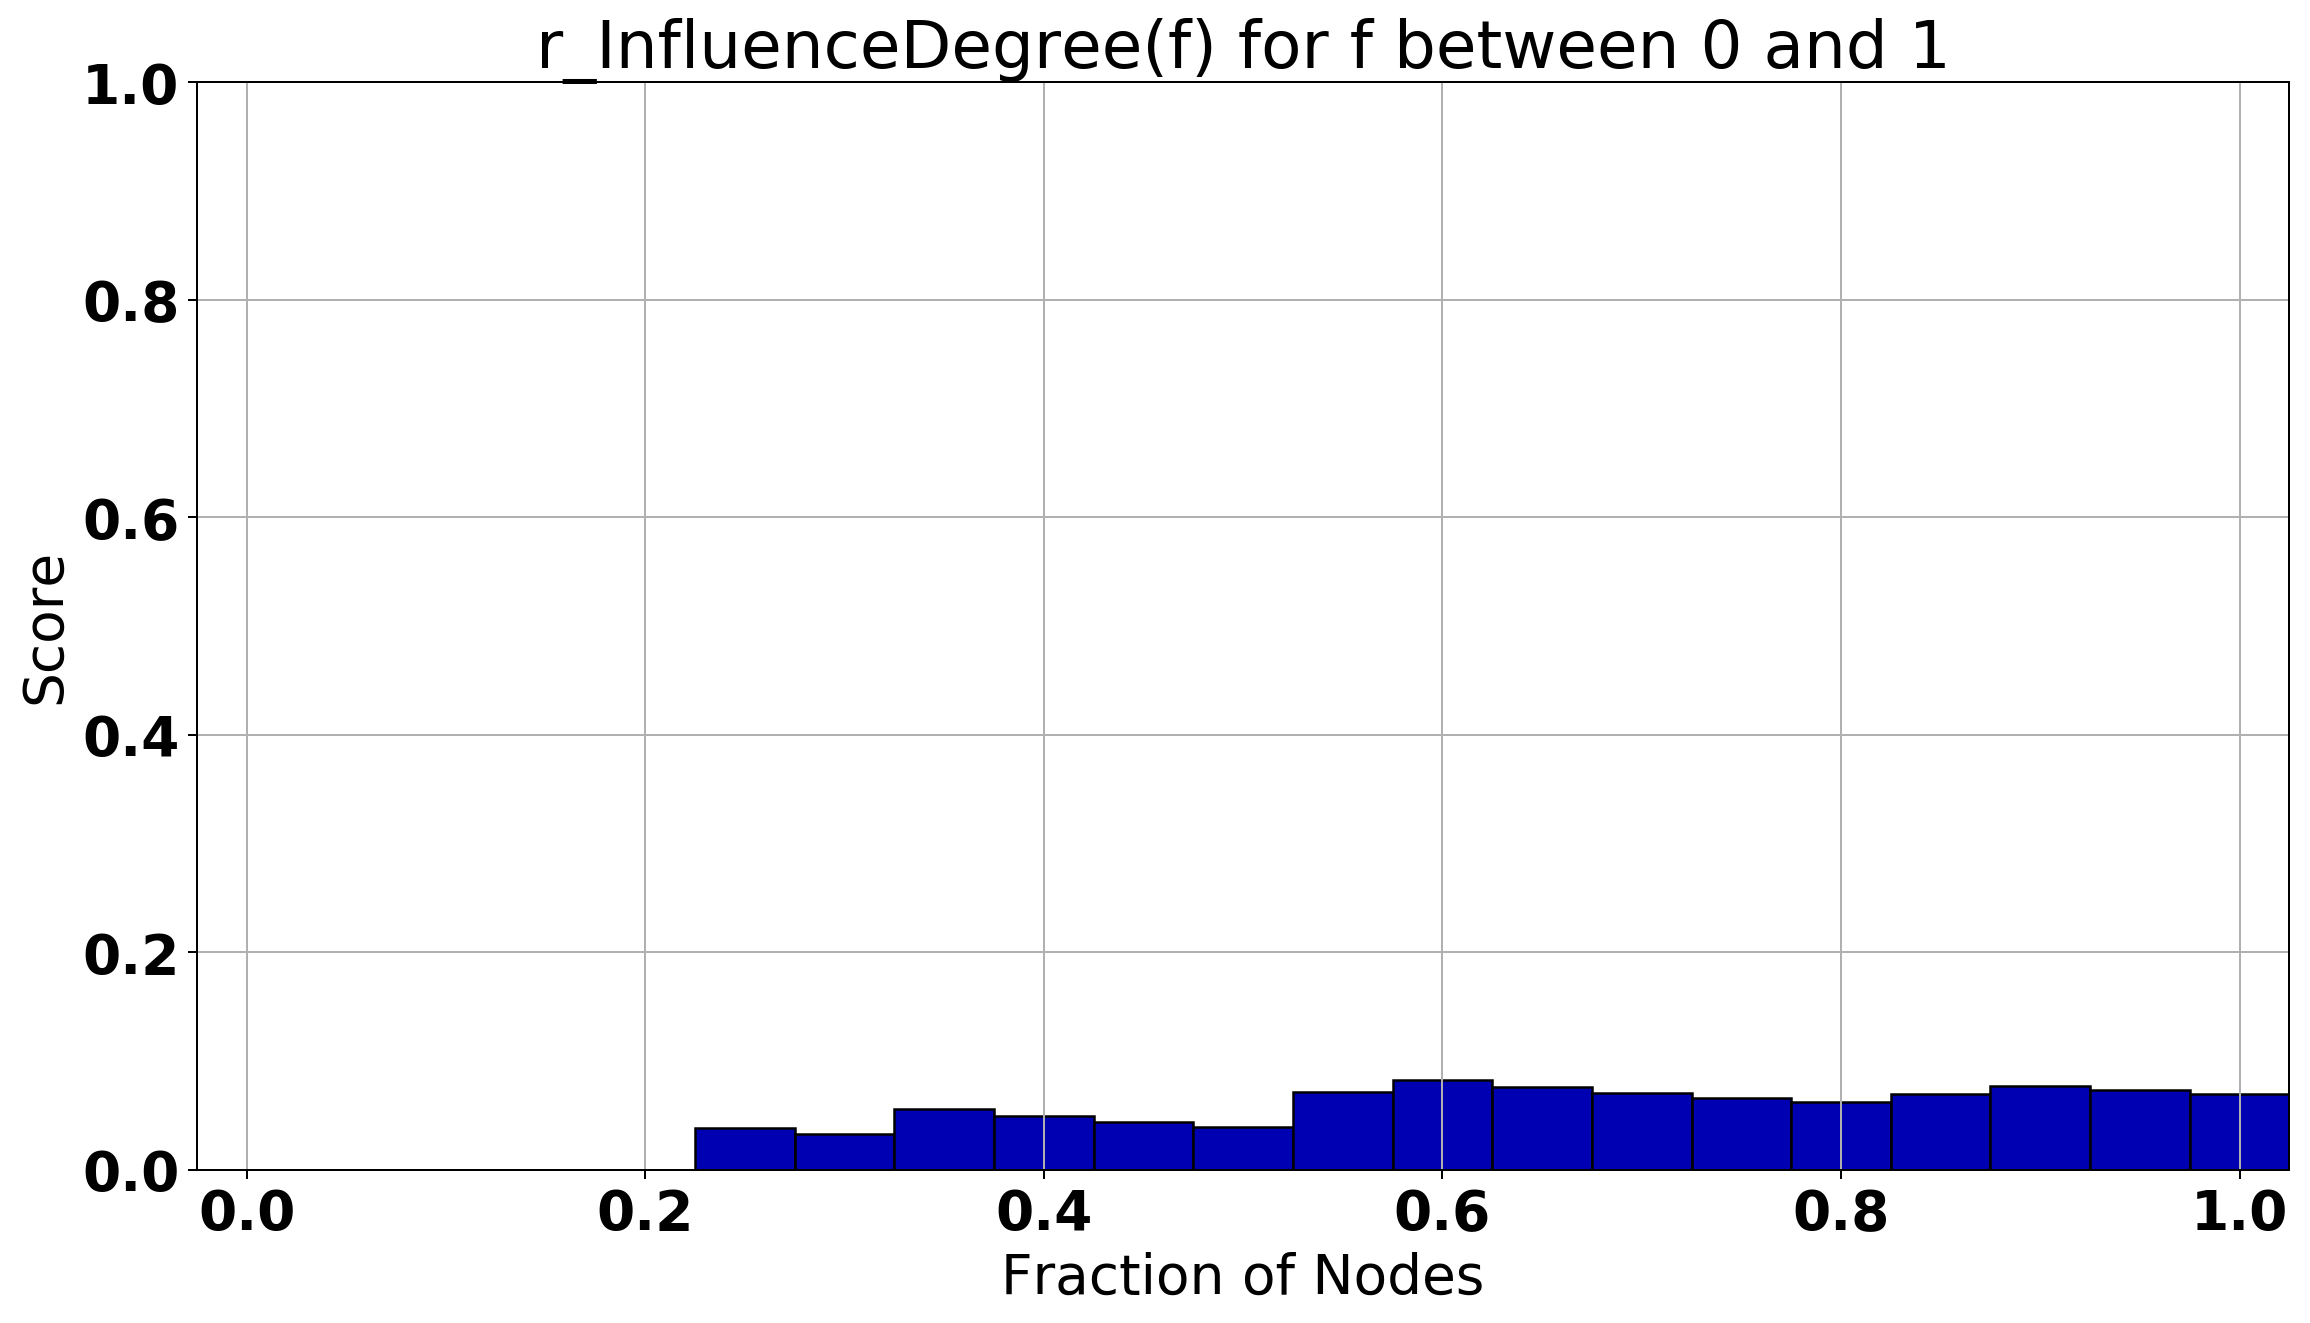

In [66]:
recognitionRateChart(True, 'Influence', G2_ranking_influence, 'Degree', G2_ranking_degrees)